## Regression

### 1. Import modules

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### 2. Load dataset

In [2]:
df = pd.read_csv('house_price.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3. Regression analyses

#### 3.1 Prepare data

Use only int and float data types

In [6]:
X = df.select_dtypes(include=['float64','int64'])


Identify columns fith missing or NaN in data.

In [7]:
X.columns[X.isna().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Remove columns with missing or NaN in data

In [8]:
X.head()
X = X.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)

In [9]:
y = df['SalePrice']

#### 3.2 Split data in training and testing sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

#### 3.3 Import train models.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#### 3.4 Train models 

Select models to use

In [12]:
methods = {'LinearRegression': LinearRegression(),
          'SVR': SVR(C=1.0, epsilon=0.2),
          'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)}

Train models

In [13]:
for key, value in methods.items():
    value.fit(X_train, y_train)

Make prediction on X_test

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

all_prediction = {'LinearRegression': 0,
          'SVR': 0,
          'KNeighborsRegressor': 0}

for key, method in methods.items():
    y_pred = method.predict(X_test)
    all_prediction[key] = y_pred


Estimate error

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

error = {'LinearRegression': 0,
          'SVR': 0,
          'KNeighborsRegressor': 0}

for key, pred in all_prediction.items():
    mse = mean_squared_error(y_test, pred)
    error[key] = mse
error

{'LinearRegression': 9.704981521087906e-21,
 'SVR': 7842688525.922781,
 'KNeighborsRegressor': 84302056.58356164}

### 4. Report

Plot relevant data in dataset

Text(0.5, 1.0, 'Numeric Feature heatmap')

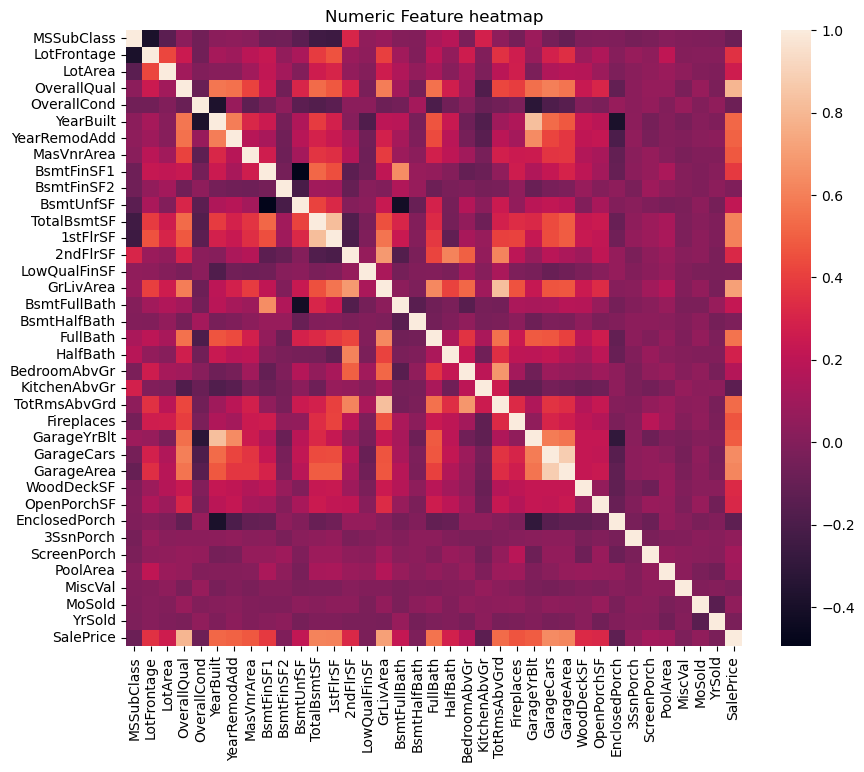

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
correlation = df.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

Text(0.5, 1.0, 'Numeric Feature heatmap')

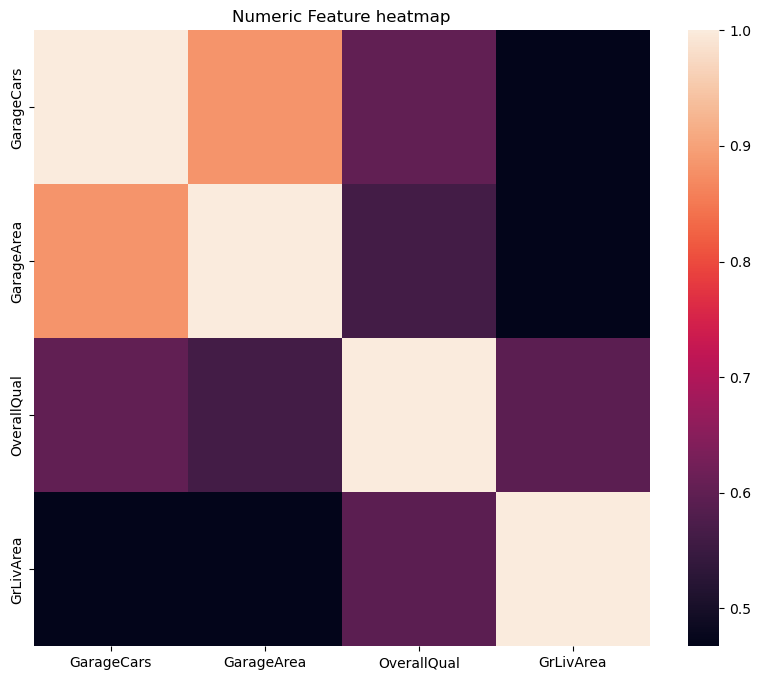

In [17]:
fig,ax = plt.subplots(figsize=(10,8))
df2 = df[['GarageCars', 'GarageArea', 'OverallQual', 'GrLivArea']].copy()
correlation = df2.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

Compare mean square error using Decision Tree, Random Forest and Support Vector Regression.

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Select regression methods to use
methods = {'DecisionTree': DecisionTreeRegressor(),
           'RandomForest': RandomForestRegressor(),
           'SVR': SVR(C=1.0, epsilon=0.2)}

# Train the regression models
for key, value in methods.items():
    value.fit(X_train, y_train)
    
# Produce predictions from trained models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
all_prediction = {'DecisionTree': 0,
          'RandomForest': 0,
          'SVR': 0}
for key, method in methods.items():
    y_pred = method.predict(X_test)
    all_prediction[key] = y_pred

# Estimate the errors
from sklearn.metrics import mean_squared_error, r2_score
error = {'DecisionTree': 0,
          'RandomForest': 0,
          'SVR': 0}
for key, pred in all_prediction.items():
    mse = mean_squared_error(y_test, pred)
    error[key] = mse
error

{'DecisionTree': 227484345.5,
 'RandomForest': 54375126.50205926,
 'SVR': 7842688525.922781}

Which technique performed better and why?

The decision tree has a high RMSE compared to random forest. This indicates that there is overfitting, where the model is trained very closely to the training data which has noise. This means, instead of capturing the underlying patterns and relationships, it captures noise and fluctuations. This results in poorer generalisation to new and unseen data.

The random forest has the lowest RMSE. The ensemble nature of random forest allows for a combination of multiple decision trees to help reduce overfitting of data. This can drastically improve the predictive accuracy.

Support vector regression has the highest RMSE.